# Construction de Psi

## Librairies

In [1]:
from kymatio.numpy import Scattering1D
from matplotlib import pyplot as plt
import numpy as np
from scipy.io import wavfile
from maad.features import tfsd
from maad.sound import spectrogram
import os

## Test

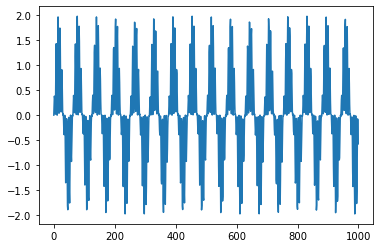

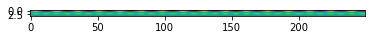

In [2]:
N = 1000
wp = 1
wm = 0.1

x = np.array([(1 + np.sin(wp*t))*np.sin(wm*t) for t in range(N)])
plt.plot(x)
plt.show()

scattering = Scattering1D(J=2, shape=(N), max_order=2)

sc = scattering(x)

plt.imshow(sc)
plt.show()

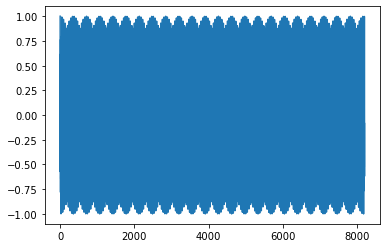

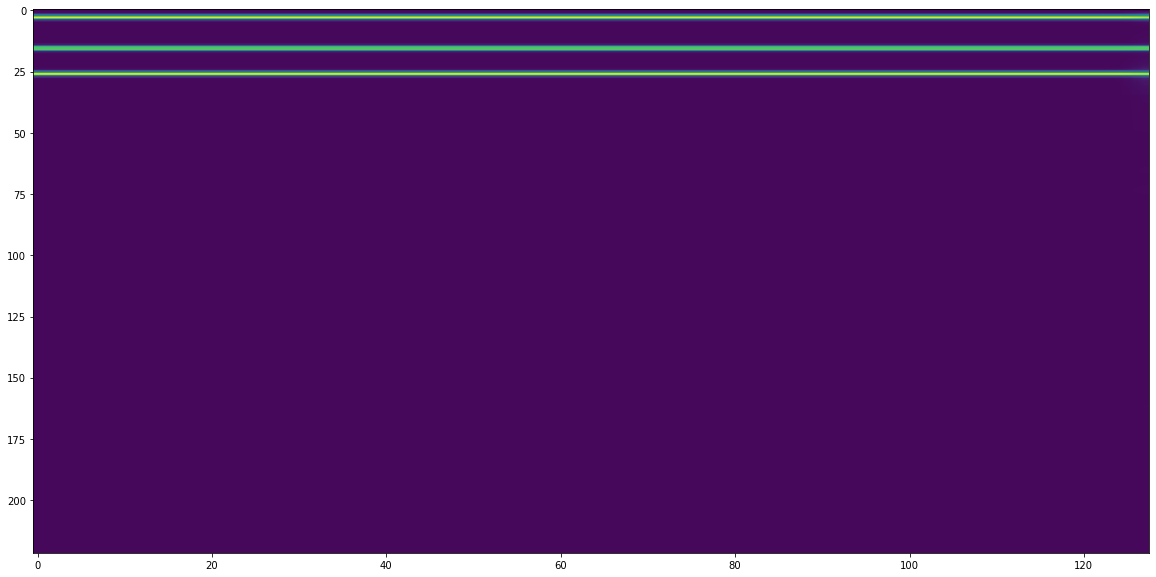

In [3]:
# Set the parameters of the scattering transform.
J = 6
T = 2 ** 13
Q = 16

# Generate a sample signal.
wp = 10
wm = 1

x1 = np.array([np.cos(wp*t) + np.cos(wm*t) for t in range(T)])
x2 = np.array([(1 + np.cos(wp*t))*np.cos(wm*t)/2 for t in range(T)])
plt.plot(x2)
plt.show()

# Define a Scattering1D object.
S = Scattering1D(J, T, Q, max_order=2)

# Calculate the scattering transform.
Sx = S.scattering(x2)

fig=plt.figure(figsize=(20, 10))
plt.imshow(Sx, aspect='auto')

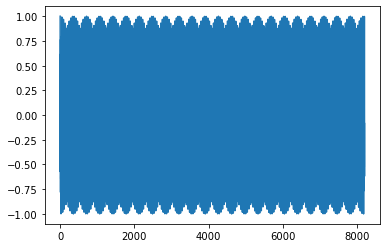

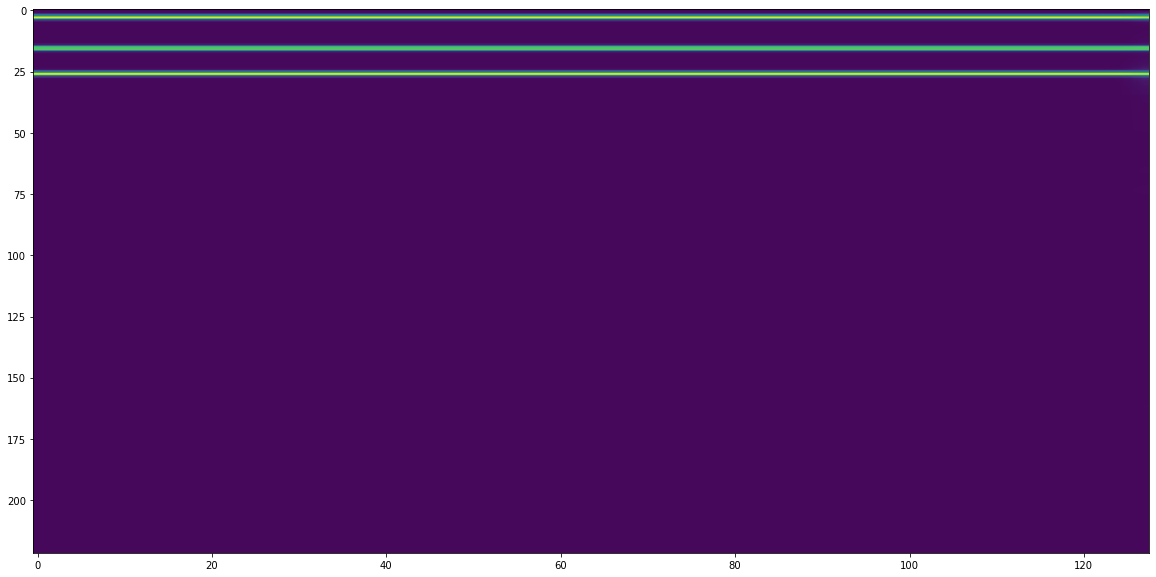

In [4]:
# Set the parameters of the scattering transform.
J = 6
T = 2 ** 13
Q = 16

# Generate a sample signal.
wp = 10
wm = 1

x1 = np.array([np.cos(wp*t) + np.cos(wm*t) for t in range(T)])
x2 = np.array([(1 + np.cos(wp*t))*np.cos(wm*t)/2 for t in range(T)])
plt.plot(x2)
plt.show()

# Define a Scattering1D object.
S = Scattering1D(J, T, Q, max_order=2)

# Calculate the scattering transform.
Sx = S.scattering(x2)

fig=plt.figure(figsize=(20, 10))
plt.imshow(Sx, aspect='auto')

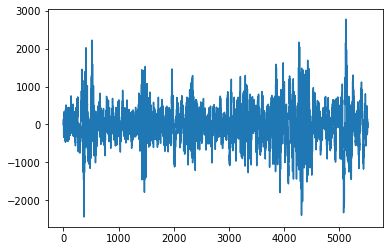

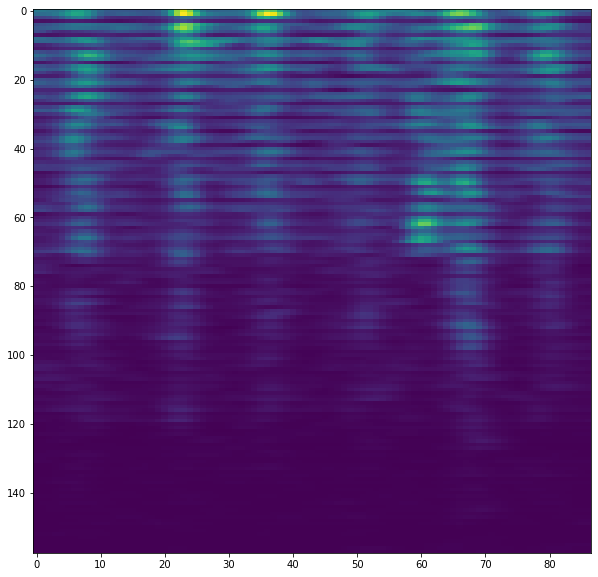

In [5]:
# Chargement du son

fe, x = wavfile.read('son.wav')

downscale = 20

x = x[::downscale]

plt.plot(x)


# Scattering transform

J = 6
T = x.shape[-1]
Q = 16

S = Scattering1D(J, T, Q)

Sx = S.scattering(x / np.max(np.abs(x)))


# Displaying the scattering trasform

meta = S.meta()
order0 = np.where(meta['order'] == 0)
order1 = np.where(meta['order'] == 1)
order2 = np.where(meta['order'] == 2)

fig=plt.figure(figsize=(10, 10))
plt.imshow(Sx[order2], aspect='auto')
plt.show()

5513


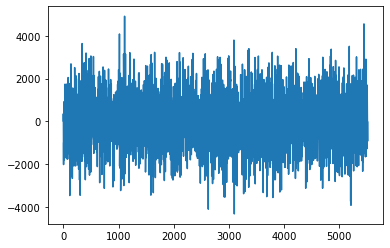

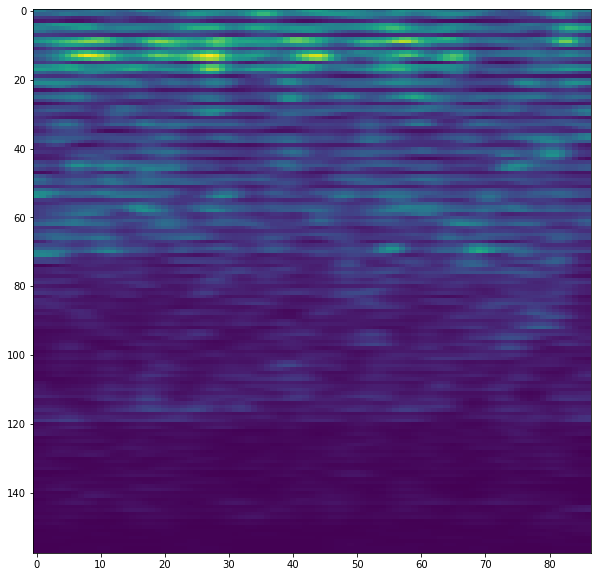

(158, 87)


In [6]:
# Chargement du son

fe, x = wavfile.read('son2.wav')

downscale = 20

x = x[::downscale]

plt.plot(x)


# Scattering transform

J = 6
T = x.shape[-1]
Q = 16

print(T)

S = Scattering1D(J, T, Q)

Sx = S.scattering(x / np.max(np.abs(x)))


# Displaying the scattering trasform

meta = S.meta()
order0 = np.where(meta['order'] == 0)
order1 = np.where(meta['order'] == 1)
order2 = np.where(meta['order'] == 2)

fig=plt.figure(figsize=(10, 10))
plt.imshow(Sx[order2], aspect='auto')
plt.show()

print(Sx[order2].shape)

In [7]:
# Définition de petit phi i
phi_i = Sx.flatten()/(np.linalg.norm(Sx))

In [8]:
fe, x = wavfile.read('son2.wav')
Spec, tn, fn, _ = spectrogram(x, fe)
qi = tfsd(Spec, fn, tn)

print(qi)

0.5889909


## Construction

In [9]:
# Fonction qui calcule le psi_i pour un son
def compute_psi_i(filename, J, Q, downscaleFactor):
    
    # Reading the signal s
    fe, s = wavfile.read(filename)
    
    # Computing the pertinence qi
    Spec, tn, fn, _ = spectrogram(s, fe)
    qi = tfsd(Spec, fn, tn)
    
    # Computing the descriptor phi_i
    s = s[::downscaleFactor]
    
    T = s.shape[-1]

    scattering = Scattering1D(J, T, Q)

    scalogram = scattering(s / np.max(np.abs(s)))

    order2 = np.where(scattering.meta()['order'] == 2)

    phi_i = scalogram[order2].flatten()
    phi_i = phi_i / np.linalg.norm(phi_i)

    # Returning psi_i
    return np.sqrt(qi)*phi_i


# Fonction qui réuni tous les psi_i dans une seule matrice psi
def compute_psi(root, J, Q, downscaleFactor):
    
    n = 432
    psi = [0] * n
    
    k = 0
    progress = -1
    for root, dirnames, filenames in os.walk(root):
        for f in filenames:
            
            percentage = round(k/n * 100)
            if (percentage % 10) == 0 and percentage > progress:
                progress = percentage
                print(percentage, "%")
                
            filename = os.path.join(root, f)
            psi[k] = compute_psi_i(filename, J, Q, downscaleFactor)
            k += 1
    print("DONE")
    
    return np.array(psi)

29739


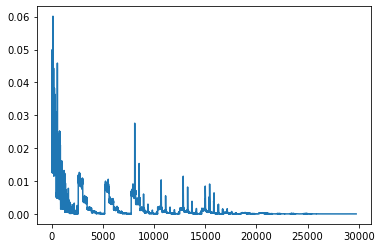

In [14]:
# Taille d'un signal : 110250
J = 8
Q = 3
psi_i = compute_psi_i('son.wav', J, Q, 1)
print(psi_i.shape[-1])
plt.plot(psi_i)
plt.show();

In [11]:
J = 6
Q = 16
psi = compute_psi('./SoundDatabase', J, Q, 200)
print(psi.shape)

0 %
10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %
100 %
DONE
(432, 1422)
